In [46]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,4)
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [3]:
train_df = pd.read_csv('./train_data.tsv',sep='\t')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 5 columns):
일자      20010 non-null int64
time    20010 non-null object
식사내용    20010 non-null object
매출일자    20010 non-null float64
수량      20010 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 781.7+ KB


In [4]:
train_df.head()

,일자,time,식사내용,매출일자,수량
0,20030301,아침,"과일샐러드,닭죽,돈육마늘장조림,떡만두국,부추김무침,쌀밥,딸기잼(중),비엔나구이,스크...",20030301.0,37.472924
1,20030301,저녁,"감자으깸샐러드,비프까스,스위트피클,쌀밥,옥수수스프,",20030301.0,19.566787
2,20030301,점심,"골뱅이야채무침,새우맛살튀김,쌀밥(사무직),열무겉절이,칼국수,",20030301.0,31.191336
3,20030302,아침,"계란죽,곤약멸치조림,김치국,마카로니샐러드,쌀밥,오징어회무침,딸기잼(중),삶은계란,야...",20030302.0,36.101083
4,20030302,저녁,"계란탕,단무지잔파무침,자장소스,잡채밥,탕수만두,",20030302.0,21.949458


### 식사내용만 이용
* bag of words(tfidf)
* LSA

In [5]:
doc_list = train_df['식사내용'].apply(lambda x: ' '.join(x[:-1].split(','))).tolist()

In [6]:
len(doc_list)

20010

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000,ngram_range=range(1,3))

In [8]:
X_food = vectorizer.fit_transform(doc_list)
print(X_food.shape)

(20010, 2000)


In [9]:
Y = train_df['수량'].values.reshape(-1,1)

In [10]:
print(X_food.shape, Y.shape)

(20010, 2000) (20010, 1)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [12]:
model = LinearRegression()

In [13]:
cross_val_score(model,X=X_food,y=Y,cv=5, verbose=True,scoring='mean_squared_error')

/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0

array([-204.5795797 ,  -87.84013638,  -81.47071547,  -64.36596627,
        -61.2262333 ])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_food, Y, test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.50827359949578632

In [16]:
print("RMSE: %.2f"% math.sqrt(np.mean(( model.predict(X_test) - y_test) ** 2)))

RMSE: 8.41


### LSA 

In [25]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [26]:
svd = TruncatedSVD(n_components=1000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd,normalizer)

In [27]:
X_lsa = lsa.fit_transform(X_food)

exp_var = svd.explained_variance_ratio_.sum()

In [28]:
print(X_lsa.shape, exp_var)

(20010, 1000) 0.901817302564


In [29]:
model = LinearRegression()
cross_val_score(model,X=X_lsa,y=Y,cv=5, verbose=True,scoring='mean_squared_error')

/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0

array([-315.51949176,  -78.94757487,  -73.86875381,  -66.40550279,
        -89.72870619])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_lsa, Y, test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.51930690188185402

In [31]:
print("RMSE: %.2f"% math.sqrt(np.mean((model.predict(X_test) - y_test) ** 2)))

RMSE: 8.15


In [42]:
print(explained_variance_score(model.predict(X_test),y_test))

0.187814327256


### Xgboost

In [32]:
import xgboost

In [33]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [34]:
%%time
xgb.fit(X_train,y_train)

CPU times: user 3min 23s, sys: 771 ms, total: 3min 24s
Wall time: 3min 24s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [53]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.0639287713259


In [54]:
predictions

array([ 26.4788456 ,  27.52143288,  37.09771347, ...,  32.03249359,
        29.00988579,  39.14298248], dtype=float32)

In [55]:
y_test

array([[ 26.06498195],
       [ 26.78700361],
       [ 48.66425993],
       ..., 
       [ 29.67509025],
       [ 35.81227437],
       [ 33.21299639]])

In [56]:
print("RMSE: %.2f"% math.sqrt(np.mean((xgb.predict(X_test) - y_test) ** 2)))

RMSE: 14.43


/Users/1003874/anaconda/envs/gcp-vision/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


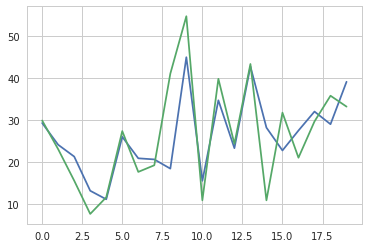

In [58]:
plt.plot(predictions[-20:])
plt.plot(y_test[-20:])